In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('ggplot')

In [5]:
df = pd.read_csv('../datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


[]

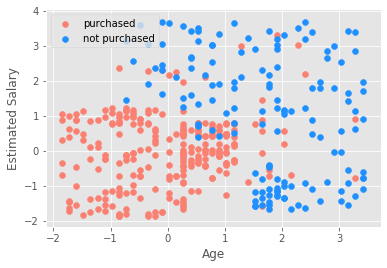

In [63]:
from sklearn.preprocessing import StandardScaler

purchased_df = df[df['Purchased'] == 0]
not_purchased_df = df[df['Purchased'] == 1]

x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_purchased = purchased_df['Age'].values
y_purchased = purchased_df['EstimatedSalary'].values
x_npurchased = not_purchased_df['Age'].values
y_npurchased = not_purchased_df['EstimatedSalary'].values

x_purchased = x_scaler.fit_transform(x_purchased.reshape((-1, 1))).reshape((1, -1))[0]
x_npurchased = x_scaler.transform(x_npurchased.reshape((-1, 1))).reshape((1, -1))[0]
y_purchased = y_scaler.fit_transform(y_purchased.reshape((-1, 1))).reshape((1, -1))[0]
y_npurchased = y_scaler.transform(y_npurchased.reshape((-1, 1))).reshape((1, -1))[0]

plt.scatter(x_purchased, y_purchased, c='salmon', label='purchased')
plt.scatter(x_npurchased, y_npurchased, c='dodgerblue', label='not purchased')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.plot()

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

x_scaler = StandardScaler()
X = x_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
print(f'classifier score: {classifier.score(X_test, y_test)}')

cm = confusion_matrix(y_test, classifier.predict(X_test))
print(cm)

classifier score: 0.93
[[64  4]
 [ 3 29]]
